In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [36]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [37]:
X_train = train_df.iloc[:, 1:].values / 255.0  
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values


In [38]:
num_classes = len(np.unique(y_train))

In [39]:
num_classes += 1

In [40]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [41]:
img_width = 28
img_height = 28
timesteps = img_height  
input_features = img_width

In [42]:
X_train = X_train.reshape(-1, timesteps, input_features)
X_test = X_test.reshape(-1, timesteps, input_features)


In [43]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(timesteps, input_features)))
model.add(Dropout(0.2))  
model.add(LSTM(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [60]:
batch_size = 64
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
344/344 [==============================] - 23s 66ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0193 - val_accuracy: 0.9956
Epoch 2/10
344/344 [==============================] - 23s 68ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 1.2242e-04 - val_accuracy: 1.0000
Epoch 3/10
344/344 [==============================] - 24s 70ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 2.4837e-04 - val_accuracy: 1.0000
Epoch 4/10
344/344 [==============================] - 24s 69ms/step - loss: 1.3333e-04 - accuracy: 1.0000 - val_loss: 4.8675e-05 - val_accuracy: 1.0000
Epoch 5/10
344/344 [==============================] - 24s 70ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.0968 - val_accuracy: 0.9701
Epoch 6/10
344/344 [==============================] - 23s 67ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0243 - val_accuracy: 0.9916
Epoch 7/10
344/344 [==============================] - 24s 70ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 9.2882

In [61]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

225/225 [==============================] - 3s 14ms/step - loss: 0.5970 - accuracy: 0.8617
Test Loss: 0.5969664454460144, Test Accuracy: 0.8616843223571777


In [63]:
import numpy as np

# Assuming you have actual labels and predicted labels
test_labels = np.array([1, 0, 1, 0, 1])  # Replace with your actual labels
test_pred_labels = np.array([1, 1, 0, 0, 1])  # Replace with your predicted labels

# Calculate accuracy
correct_predictions = np.equal(test_labels, test_pred_labels)
accuracy = np.mean(correct_predictions)

# Calculate precision, recall, and F1-score
true_positives = np.sum(correct_predictions & (test_labels == 1))
false_positives = np.sum((correct_predictions == 0) & (test_labels == 0))
false_negatives = np.sum((correct_predictions == 0) & (test_labels == 1))

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


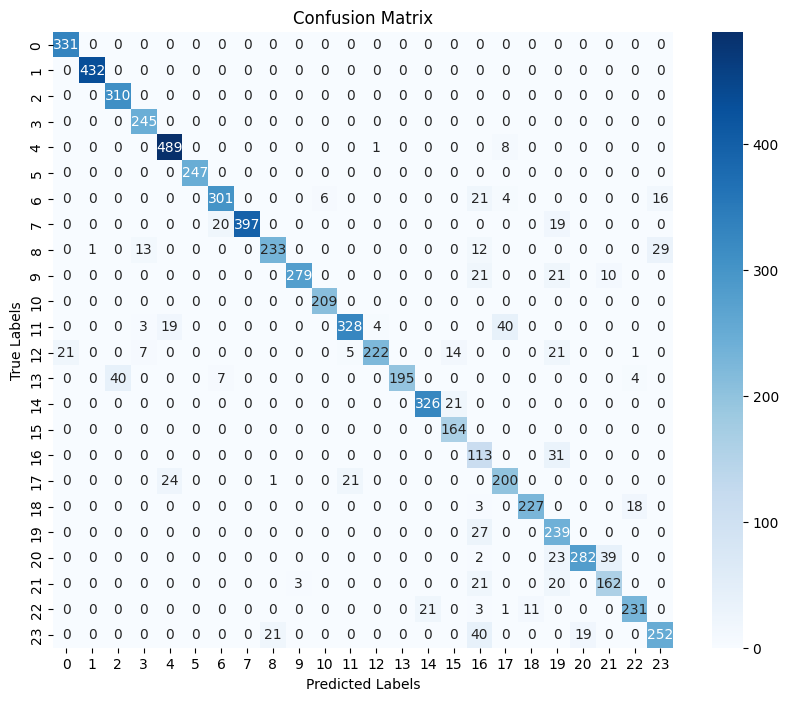

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [65]:
from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_true_labels, y_pred_labels)

# Print the classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       0.89      1.00      0.94       310
           3       0.91      1.00      0.96       245
           4       0.92      0.98      0.95       498
           5       1.00      1.00      1.00       247
           6       0.92      0.86      0.89       348
           7       1.00      0.91      0.95       436
           8       0.91      0.81      0.86       288
          10       0.99      0.84      0.91       331
          11       0.97      1.00      0.99       209
          12       0.93      0.83      0.88       394
          13       0.98      0.76      0.86       291
          14       1.00      0.79      0.88       246
          15       0.94      0.94      0.94       347
          16       0.82      1.00      0.90       164
          17       0.43      0.78      0.56       144
   

Epoch 1/10
344/344 [==============================] - 21s 62ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 2.6306e-04 - val_accuracy: 1.0000
Epoch 2/10
344/344 [==============================] - 23s 68ms/step - loss: 2.3813e-04 - accuracy: 1.0000 - val_loss: 5.2961e-05 - val_accuracy: 1.0000
Epoch 3/10
344/344 [==============================] - 24s 71ms/step - loss: 9.7427e-05 - accuracy: 1.0000 - val_loss: 3.0006e-05 - val_accuracy: 1.0000
Epoch 4/10
344/344 [==============================] - 23s 66ms/step - loss: 0.0392 - accuracy: 0.9888 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 5/10
344/344 [==============================] - 25s 71ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 4.0061e-04 - val_accuracy: 0.9998
Epoch 6/10
344/344 [==============================] - 24s 69ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 7/10
344/344 [==============================] - 24s 69ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss

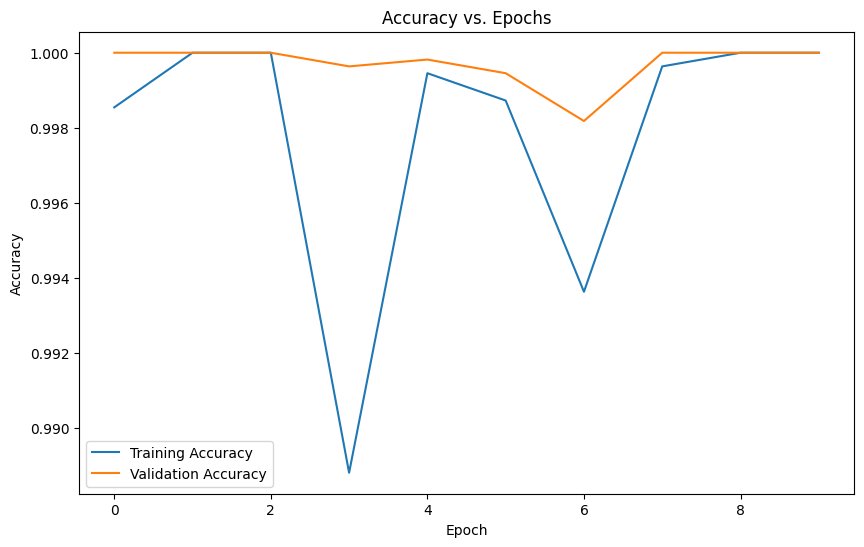

In [66]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()
